# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
import numpy as np
import pandas as pd

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [3]:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [4]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

Comprobamos si hay valores nulos

In [5]:
sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

In [6]:
sensor.dropna()
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


How many rows and columns are in our data?

In [7]:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

Para este caso hemos de explicar como se hace (para el futuro y el presente).  

En la documentación aparece que la fecha de inicio y fin es especificada en días. Sin embargo nosotras necesitamos que acabe en una hora concreta de un día concreto y eso no puede ser escrito en el campo `end`.  
Si nos damos cuenta: `1750 = 29*60+10`, por tanto, si hacemos una frecuencia de 1s y asignamos 1571 a los periodos llegamos al valor deseado de la fecga de fin.

In [8]:
date_range = pd.date_range(start='1/1/2018', periods=1751, freq='1s')
date_range

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

Assign the time series index to the dataframe's index.

In [9]:
sensor['date']= date_range
sensor.index = sensor['date']
sensor.head()
sensor.drop(['date'], axis=1,inplace=True)
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
date,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [10]:
import statsmodels.api as sm

Para quien lo lea en el futuro, puede que necesites ejecutar estos comandos en la terminal con todas las versiones posibles de pip3 o sudo ;)  

`pip install --upgrade --no-deps statsmodels`  
`pip install patsy`

In [11]:
decomposition  = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], freq=60)
decomposition.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

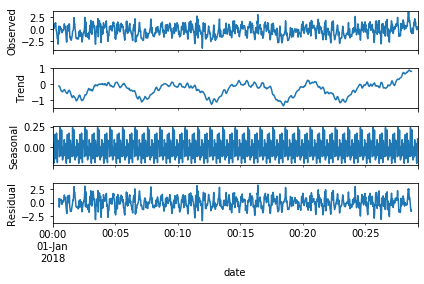

In [12]:
decomposition_rot_x  = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], freq=60)
decomposition_rot_x.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

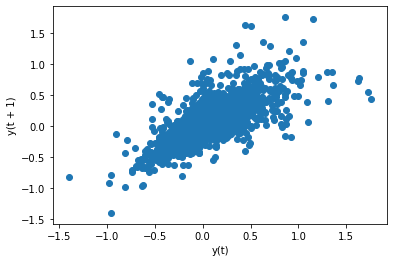

In [16]:
pd.plotting.lag_plot(sensor['userAcceleration.x']);

Create a lag plot for `rotationRate.x`

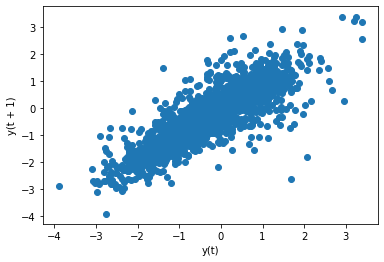

In [15]:
pd.plotting.lag_plot(sensor['rotationRate.x']);

What are your conclusions from both visualizations?

Que la rotación en el eje x afecta a más valores que la simple aceleración de la persona en el eje x, ya que el rango y el dominio de los valores a los que afecta es superior en la rotación.  
Sin embargo, parece que la tendencia es muy similar, por la forma y la relación entre y(t) e y(t+1) en ambos casos.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [17]:
from statsmodels.tsa.stattools import adfuller, kpss

In [19]:
# ADF Test
adf_test_accel_x = adfuller(sensor['userAcceleration.x'], autolag='AIC')
print(f'ADF Statistic: {adf_test_accel_x [0]}')
print(f'p-value: {adf_test_accel_x [1]}')
# KPSS Test
kpss_test_accel_x  = kpss(sensor['userAcceleration.x'], regression='c')
print('\nKPSS Statistic: %f' % kpss_test_accel_x[0])
print('p-value: %f' % kpss_test_accel_x[1])

ADF Statistic: -17.95799408616976
p-value: 2.823439483037483e-30

KPSS Statistic: 0.169368
p-value: 0.100000


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [20]:
# ADF Test
adf_test_rot_x = adfuller(sensor['rotationRate.x'], autolag='AIC')
print(f'ADF Statistic: {adf_test_rot_x [0]}')
print(f'p-value: {adf_test_rot_x [1]}')
# KPSS Test
kpss_test_rot_x  = kpss(sensor['rotationRate.x'], regression='c')
print('\nKPSS Statistic: %f' % adf_test_rot_x[0])
print('p-value: %f' % adf_test_rot_x[1])

ADF Statistic: -5.269860625086415
p-value: 6.3202303359123905e-06

KPSS Statistic: -5.269861
p-value: 0.000006


What are your conclusions from this test?

Los tests pasados a la segunda variables sí que son correctos mientras que en el primero no.  
Es decir, que en el primer caso la serie no es estacionaria pero en el segundo caso sí.


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [43]:
from statsmodels.tsa.arima_model import ARMA 

*Nota:*  
Asignamos la freq a `S`, porque de los posibles datos que puede tener, a saber:
- B
- D
- W
- M
- A
- Q  

No servía ninguno, pero el error decía que en caso de no servir se utiliza S por defecto.

In [48]:
model = ARMA(sensor['userAcceleration.x'], order=(2, 1), freq='S')

In [68]:
model_fit = model.fit(disp=False)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:     userAcceleration.x   No. Observations:                 1751
Model:                     ARMA(2, 1)   Log Likelihood                 379.399
Method:                       css-mle   S.D. of innovations              0.195
Date:                Wed, 28 Aug 2019   AIC                           -748.798
Time:                        23:15:58   BIC                           -721.458
Sample:                    01-01-2018   HQIC                          -738.692
                         - 01-01-2018                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0625      0.014      4.436      0.000       0.035       0.090
ar.L1.userAcceleration.x     0.9888      0.044     22.726      0.000       0.904       1.

In [73]:
predictions = model_fit.predict(len(sensor['userAcceleration.x']))
predictions


2018-01-01 00:29:11   -0.035042
Freq: S, dtype: float64

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [74]:
from statsmodels.tools.eval_measures import rmse

In [75]:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,predictedUserAcceleration.x
date,,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,<statsmodels.tsa.arima_model.ARMAResultsWrappe...
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,<statsmodels.tsa.arima_model.ARMAResultsWrappe...
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,<statsmodels.tsa.arima_model.ARMAResultsWrappe...
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,<statsmodels.tsa.arima_model.ARMAResultsWrappe...
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,<statsmodels.tsa.arima_model.ARMAResultsWrappe...


In [80]:
rmse = rmse(sensor['userAcceleration.x'], )

IndexError: too many indices for array

In [77]:
rmse

<function statsmodels.tools.eval_measures.rmse(x1, x2, axis=0)>

In [ ]:
model.predict()

In [ ]:
Y finalmente... lo entrego así porque estoy c